# This notebook illustrates how to migrate objects annotations to single cell segmentation in the for a a pandas DF

In this notebook, we will load the TissueTag annotated image of a IBEX protein multiplex imaging. 
Then we will translate the pixel level annotations to an hexagonal binned grid and measure the minimal euclidean distances to the annotations. 
Finally we will migrate annotations to single cell segmentation and print some plots and save the output as a CSV table.

#### init and load image

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tissue_tag as tt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Load image and define annotation names and colors 

In [2]:
# set path
path_to_tissue_tag =  # path to tissue tag main folder (e.g. c:/Users/John/Downloads/TissueTag)
path = path_to_tissue_tag + '/data/tissue_tag_minimal_example_ibex/' 

## load annotations

In [6]:
# load tissue annotations from TissueTag and migrate annotation to a 15um hexagonal grid and outputs the coordinates in ppm=1 
df_anno = tt.anno_to_grid(
    folder=path+'/tissue_annotations/',
    file_name = 'annotations_lobes',
    spot_diameter = 15,
    load_colors=True,
)

loaded annotation image - annotations_lobes size - (2704, 3948)
loaded annotations
{1: 'unassigned', 2: 'lobes_0', 3: 'lobes_1', 4: 'lobes_2', 5: 'lobes_3', 6: 'lobes_4', 7: 'lobes_5', 8: 'lobes_6', 9: 'lobes_7', 10: 'lobes_8', 11: 'lobes_9', 12: 'lobes_10', 13: 'lobes_11', 14: 'lobes_12', 15: 'lobes_13', 16: 'lobes_14'}
loaded ppm
{'ppm': 1}
loaded color annotations
{'unassigned': 'yellow', 'lobes_0': 'red', 'lobes_1': 'green', 'lobes_2': 'green', 'lobes_3': 'orange', 'lobes_4': 'magenta', 'lobes_5': 'green', 'lobes_6': 'red', 'lobes_7': 'red', 'lobes_8': 'magenta', 'lobes_9': 'green', 'lobes_10': 'green', 'lobes_11': 'green', 'lobes_12': 'cyan', 'lobes_13': 'green', 'lobes_14': 'red'}
generating grid with spot size - 15, with resolution of - 1 ppm
annotations_lobes


47520it [00:07, 6307.33it/s]


In [11]:
df_anno = df_anno[df_anno['annotations_lobes']!='unassigned']

## move annotations to cells (or anything that has xy coordinates)  

Load single cell reference (IBEX segmentation)

In [7]:
# read cell segmentation
df_cells = pd.read_csv(path+'sample_05_xy.csv')
# correct coordinates to pixel space 
ppm_cells = 3.5198
df_cells['y'] = df_cells['centroid-0']
df_cells['x'] = df_cells['centroid-1']
df_cells

,Unnamed: 0,centroid-0,centroid-1,y,x
0,0,21.049881,4322.589074,21.049881,4322.589074
1,1,40.732535,4327.992016,40.732535,4327.992016
2,2,40.332468,4362.800000,40.332468,4362.800000
3,3,45.308157,4345.679758,45.308157,4345.679758
4,4,52.028721,4311.151436,52.028721,4311.151436
...,...,...,...,...,...
112168,112168,9466.446809,3947.117021,9466.446809,3947.117021
112169,112169,9466.835366,4922.692073,9466.835366,4922.692073
112170,112170,9467.217514,6774.098870,9467.217514,6774.098870
112171,112171,9466.623288,2953.948630,9466.623288,2953.948630


Make sure the coordinate systems are aligned, e.g., axes are not flipped and the resolution is matched.


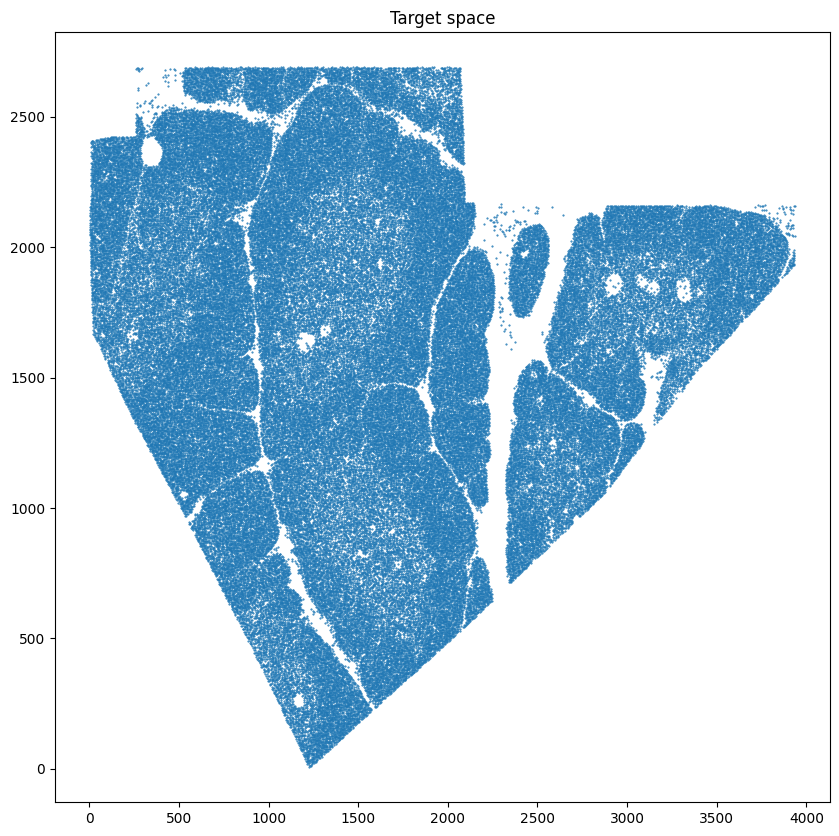

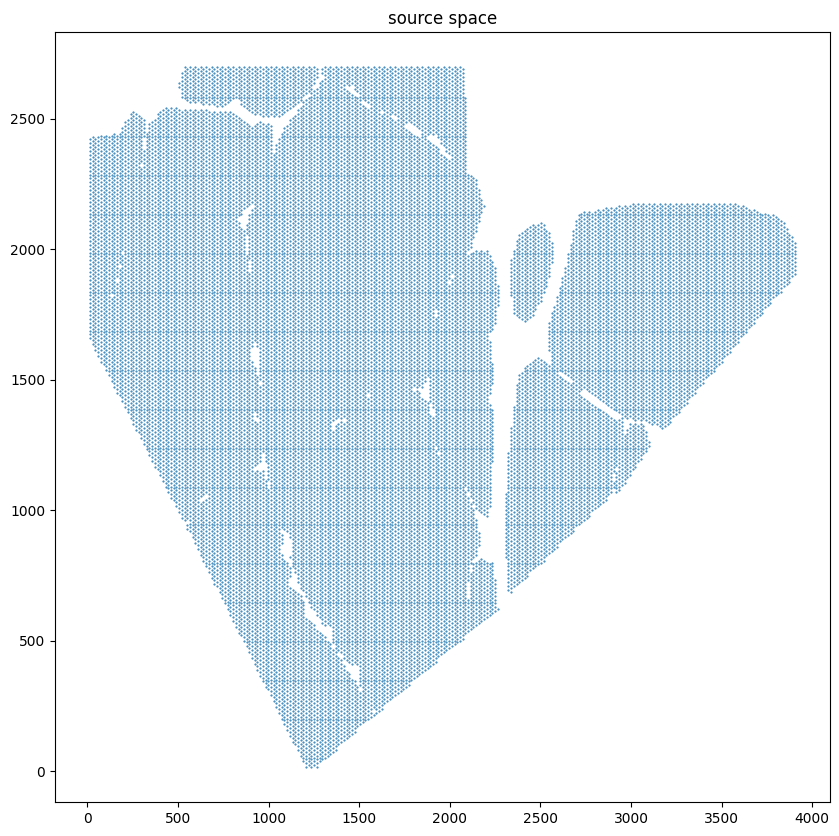

Migrating source annotation - annotations_lobes to target space.
Migrating source annotation - annotations_lobes_number to target space.


,Unnamed: 0,centroid-0,centroid-1,y,x,annotations_lobes,annotations_lobes_number
0,0,21.049881,4322.589074,21.049881,4322.589074,lobes_8,10.0
1,1,40.732535,4327.992016,40.732535,4327.992016,lobes_8,10.0
2,2,40.332468,4362.800000,40.332468,4362.800000,lobes_8,10.0
3,3,45.308157,4345.679758,45.308157,4345.679758,lobes_8,10.0
4,4,52.028721,4311.151436,52.028721,4311.151436,lobes_8,10.0
...,...,...,...,...,...,...,...
112168,112168,9466.446809,3947.117021,9466.446809,3947.117021,lobes_11,13.0
112169,112169,9466.835366,4922.692073,9466.835366,4922.692073,lobes_9,11.0
112170,112170,9467.217514,6774.098870,9467.217514,6774.098870,lobes_10,12.0
112171,112171,9466.623288,2953.948630,9466.623288,2953.948630,lobes_11,13.0


In [12]:
df_cells = tt.map_annotations_to_target(                            
    df_target=df_cells,  
    df_source=df_anno,
    ppm_target= ppm_cells,
    plot=True,
)
df_cells

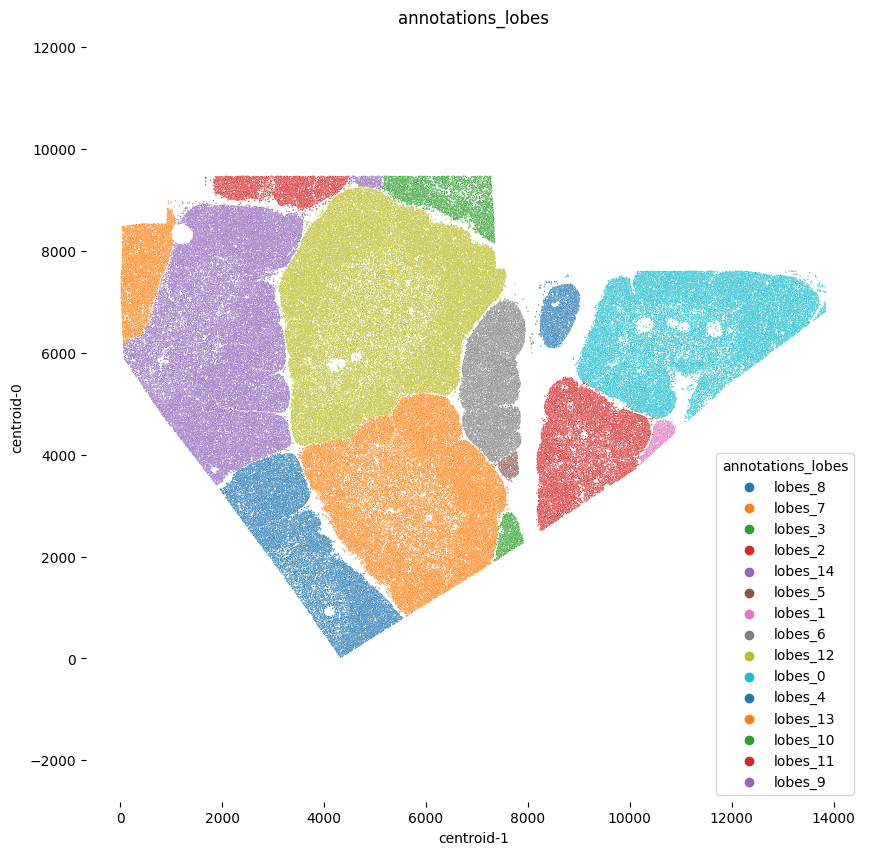

In [14]:
plt.figure(dpi=100, figsize=[10,10])
sns.scatterplot(x='centroid-1', y='centroid-0', data=df_cells, hue='annotations_lobes', palette='tab10', s=1)
plt.grid(False)
plt.title('annotations_lobes')
plt.axis('equal')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()